In [2]:
%matplotlib inline

# import libraries to read and plot statistical analyses of marine satellite data
import pandas as pd
import xarray as xr
import numpy as np
import warnings
import cmocean as cmo
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import gridspec, ticker
# from scipy.ndimage.filters import gaussian_filter
# warnings.filterwarnings('ignore')
# import glob
# import seawater as sw
from dask.diagnostics import ProgressBar

In [3]:
#### LOAD SEA SURFACE TEMPERATURE DATASET ##### 

source = xr.open_mfdataset('/home/br/git/CMEMS/ostia_data/SST*',concat_dim='time')
source = source.assign({'analysed_sst':source.analysed_sst-273})
source.close()

In [4]:
#batimetria
# LOAD BATHYMETRY

dado = xr.open_dataset('/home/br/git/CMEMS/gebco-data/gebco_2020_n-20.0_s-40.0_w-60.0_e-40.0.nc')

bat = dado.interp({'lon':source.lon, 'lat':source.lat}).elevation

dado.close()
bat.close()

In [5]:
mask_sst = source.analysed_sst.sel(lon=slice(-55.0, -40.0), lat=slice(-33.8, -21.0)).where((bat>-200)&(bat<-10 ))
#mask_sst

In [6]:
with ProgressBar():
    mean_sst = mask_sst.mean(['lon','lat']).compute()

[########################################] | 100% Completed | 26.9s


In [7]:
#mean_sst.time

In [8]:
#plot serie

In [9]:
# groupby
year_sst = mask_sst.groupby('time.year').mean('time')
ssts = year_sst.sel(year=slice('1985','2019'))

with ProgressBar():
    ymean_sst = ssts.mean(['lon','lat']).compute() 

[########################################] | 100% Completed | 26.0s


In [13]:
sst_serie.to_csv('sst_time_series_from_netcdf.csv')


In [12]:
sst_serie =ymean_sst.to_series()

Text(0.5, 1.0, 'Sea Surface Temperature')

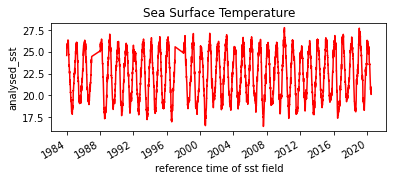

In [6]:
plt.figure(figsize=(6,2))
mean_sst.plot(x ="time" , color='red',linestyle='-')
plt.title('Sea Surface Temperature')

Text(0.5, 1.0, 'Sea Surface Temperature')

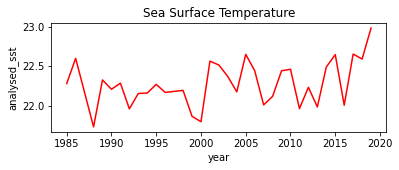

In [42]:
plt.figure(figsize=(6,2))
ymean_sst.plot(x ="year" , color='red',linestyle='-')
plt.title('Sea Surface Temperature')

In [38]:
year_sst = mask_sst.sel(time=slice('1985','2019')).groupby('time.year').mean('time')

with ProgressBar():
    year_y_sst = year_sst.mean(['lon','lat']).compute() 

[########################################] | 100% Completed | 30.7s


In [29]:
mon_sst = mask_sst.sel(time=slice('1985','2019')).groupby('time.month').mean('time')

with ProgressBar():
    mean_m_sst = mon_sst.mean(['lon','lat']).compute() 

[########################################] | 100% Completed | 18.9s


In [39]:
#mean_m_sst
year_y_sst

<xarray.DataArray 'analysed_sst' (year: 33)>
array([22.281431, 22.599066, 21.735994, 22.32697 , 22.209463, 22.286753,
       21.96276 , 22.156464, 22.162315, 22.27157 , 22.169975, 22.195812,
       21.8691  , 21.800392, 22.564312, 22.515316, 22.369543, 22.176527,
       22.64996 , 22.443989, 22.012943, 22.120043, 22.443111, 22.461914,
       21.965961, 22.234102, 21.986689, 22.48998 , 22.646484, 22.008718,
       22.653471, 22.590515, 22.981497], dtype=float32)
Coordinates:
  * year     (year) int64 1985 1986 1988 1989 1990 ... 2015 2016 2017 2018 2019

Text(0.5, 1.0, 'Sea Surface Temperature')

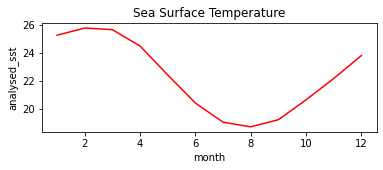

In [32]:
plt.figure(figsize=(6,2))
mean_m_sst.plot(x ="month" , color='red',linestyle='-')
plt.title('Sea Surface Temperature')

In [22]:
pd_sst = ymean_sst.to_series()
print(pd_sst)

year
1985    22.281431
1986    22.599066
1988    21.735994
1989    22.326969
1990    22.209463
1991    22.286753
1992    21.962761
1993    22.156464
1994    22.162315
1995    22.271570
1996    22.169975
1998    22.195812
1999    21.869101
2000    21.800392
2001    22.564312
2002    22.515316
2003    22.369543
2004    22.176527
2005    22.649960
2006    22.443989
2007    22.012943
2008    22.120043
2009    22.443111
2010    22.461914
2011    21.965961
2012    22.234102
2013    21.986689
2014    22.489981
2015    22.646484
2016    22.008718
2017    22.653471
2018    22.590515
2019    22.981497
Name: analysed_sst, dtype: float32


In [17]:

#variância: média dos desvios quadráticos
print(np.var(pd_sst))

0.07862363755702972


In [19]:
#desvio padrão: raiz quadrada da variância
print(np.std(pd_sst))

0.28039905428886414


In [20]:
pd_sst.describe()

count    33.000000
mean     22.283127
std       0.284747
min      21.735994
25%      22.120043
50%      22.271570
75%      22.489981
max      22.981497
Name: analysed_sst, dtype: float64